# Healthcare Classification

### Import main modules

In [739]:
import numpy as np
import csv
import pandas as pd
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as pp
from datetime import datetime




### Extract Data

In [740]:


data_array = []
csv_file_path='D:\\Artificial intelligence\\IA 2023 -\\Machine Learning\\Sklearn\\healthcare_dataset.csv'
# Open the CSV file
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV reader
    csv_reader = csv.reader(csv_file)
    
    # Iterate through each row in the CSV file
    for row in csv_reader:

        data_array.append(row)

new_data=np.array(data_array)

### Feature selection :

#### Our Feature selection will be manual (without 'sklearn.feature_selection' module)


##### Uncomment this cell if u want to clear Inconclusive samples

In [741]:
value_to_drop = 'Inconclusive'

# Identify rows where the 14th column has the specified value
rows_to_keep = new_data[:, 14] != value_to_drop

# Create a new NumPy array without the rows to drop
new_data = new_data[rows_to_keep]

In [742]:
# Specify the indices of columns you want to encode
columns_to_encode = [2,3,4,8,11,13,14] #these columns unique values are <10


label_encoders = [pp.LabelEncoder() for _ in columns_to_encode]

# Encode the selected columns
for i, encoder in zip(columns_to_encode, label_encoders):
    new_data[1:, i] = encoder.fit_transform(new_data[1:, i])

In [743]:

df= pd.DataFrame(new_data)
for i in range (len(df.columns)): # Renaming the columns 
    df.rename(columns={df.columns[i]: df.iloc[0,i]},inplace=True)
df.drop(0,inplace=True)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1,Ruben Burns,35,1,6,1,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",4,47304.06484547511,404,1,2023-06-15,2,1
2,Chad Byrd,61,1,5,5,2019-01-09,Paul Baker,Walton LLC,3,36874.89699661277,292,1,2019-02-08,2,1
3,Antonio Frederick,49,1,5,1,2020-05-02,Brian Chandler,Garcia Ltd,3,23303.322092196904,480,2,2020-05-03,4,0
4,Mrs. Brandy Flowers,51,1,7,0,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",4,18086.344183563877,477,2,2021-08-02,3,1
5,Patrick Parker,41,1,2,0,2020-08-20,Robin Green,Boyd PLC,0,22522.363384853266,180,2,2020-08-23,0,0


In [744]:

# Dropping likely misleading features
df.drop(['Name','Doctor','Hospital','Room Number'], axis=1, inplace=True)


# Creating new cell of Time spent on the hospital 
new_admission_date = np.array(df.iloc[:,4],dtype=np.datetime64)
new_discharge_date = np.array(df.iloc[:,8],dtype=np.datetime64)

time_spent=abs(np.int64(new_discharge_date-new_admission_date))

df.insert(loc=len(df.columns)-1, column='Duration', value=time_spent)

df.drop(['Date of Admission','Discharge Date'], axis=1, inplace=True)

# Getting correlation matrix between features and features-label
df_corr=pd.DataFrame(df.corr())

df_corr.head(len(df_corr))

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Duration,Test Results
Age,1.000000,-0.007592,-0.004612,0.006948,-0.003244,-0.004837,0.007825,0.014272,0.007891,0.010841
Gender,-0.007592,1.000000,0.020206,0.002296,-0.024686,-0.009138,0.007375,0.016998,-0.000966,-0.012497
Blood Type,-0.004612,0.020206,1.000000,-0.002956,0.025808,-0.003567,-0.004314,0.002905,0.010416,-0.004467
Medical Condition,0.006948,0.002296,-0.002956,1.000000,0.009378,0.003832,0.024038,0.003784,-0.010090,0.002124
Insurance Provider,-0.003244,-0.024686,0.025808,0.009378,1.000000,-0.016836,0.011699,0.020968,-0.001323,-0.012904
Billing Amount,-0.004837,-0.009138,-0.003567,0.003832,-0.016836,1.000000,0.006483,-0.028731,-0.004011,-0.007309
Admission Type,0.007825,0.007375,-0.004314,0.024038,0.011699,0.006483,1.000000,-0.004644,-0.003487,-0.013394
Medication,0.014272,0.016998,0.002905,0.003784,0.020968,-0.028731,-0.004644,1.000000,0.005760,-0.017102
Duration,0.007891,-0.000966,0.010416,-0.010090,-0.001323,-0.004011,-0.003487,0.005760,1.000000,-0.009912
Test Results,0.010841,-0.012497,-0.004467,0.002124,-0.012904,-0.007309,-0.013394,-0.017102,-0.009912,1.000000


In [745]:
data= df.iloc[:,:-1].values.astype(float)
target= df.iloc[:,-1].values.astype(float)

print(f'data shape : {data.shape}')
print(f'target shape : {target.shape}')


df.head(len(df))

data shape : (6723, 9)
target shape : (6723,)


,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Duration,Test Results
1,35,1,6,1,4,47304.06484547511,1,2,14,1
2,61,1,5,5,3,36874.89699661277,1,2,30,1
3,49,1,5,1,3,23303.322092196904,2,4,1,0
4,51,1,7,0,4,18086.344183563877,2,3,24,1
5,41,1,2,0,0,22522.363384853266,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...
6719,83,1,0,5,4,39606.84008259848,0,1,4,0
6720,47,0,2,0,1,5995.717487831519,1,1,23,1
6721,54,1,5,0,1,49559.202904673155,0,1,14,1
6722,84,1,0,0,4,25236.344760975873,2,4,20,1


### Data Splitting

In [746]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.3,shuffle=True,random_state=13)

### Train 


In [747]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(fit_intercept=True,penalty='l1',solver='liblinear',random_state=33) #L1 regularization worked better, converged after 91 iterations L2 : 4250 iter
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=33, solver='liblinear')

### Metrics

LogisticRegressionModel Train Score is :  0.5172120696982575
LogisticRegressionModel Test Score is :  0.5230540406544373
Confusion Matrix is : 
 [[774 282]
 [680 281]]
Accuracy Score is :  0.5230540406544373
F1 Score is :  0.5230540406544373


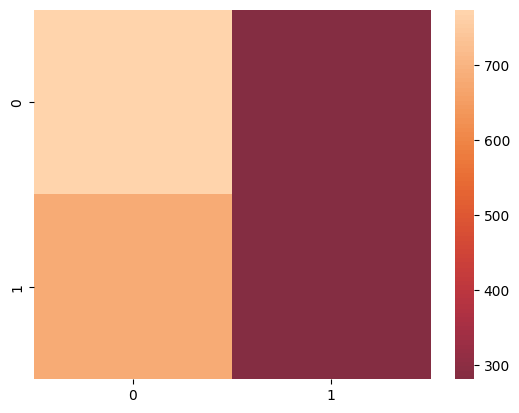

In [748]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

#Calculating Scores
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

y_pred =  LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)

#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)

#Calculating Accuracy Score  : 
AccScore = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy Score is : ', AccScore)

#Calculating F1 Score  : 
F1Score = f1_score(y_test, y_pred, average='micro') 
print('F1 Score is : ', F1Score)

#### Computing scores with Stratified Kfolds

In [749]:

from sklearn.model_selection import KFold,RepeatedKFold,RepeatedStratifiedKFold



rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=5,random_state=36851234)
for train_index, test_index in rskf.split(data, target):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

     #Calculating Details
    print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
    print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
    print('*********************')
    


TRAIN: [   0    1    2 ... 6718 6719 6720] TEST: [   6    7   10 ... 6704 6721 6722]
LogisticRegressionModel Train Score is :  0.5208250694168981
LogisticRegressionModel Test Score is :  0.5133848899464605
*********************
TRAIN: [   0    2    4 ... 6719 6721 6722] TEST: [   1    3   13 ... 6716 6718 6720]
LogisticRegressionModel Train Score is :  0.5142800476001587
LogisticRegressionModel Test Score is :  0.5330160618679357
*********************
TRAIN: [   1    3    4 ... 6720 6721 6722] TEST: [   0    2    8 ... 6712 6713 6719]
LogisticRegressionModel Train Score is :  0.5218167393891313
LogisticRegressionModel Test Score is :  0.5104104699583581
*********************
TRAIN: [   0    1    2 ... 6720 6721 6722] TEST: [   4    5    9 ... 6711 6715 6717]
LogisticRegressionModel Train Score is :  0.5189371405909181
LogisticRegressionModel Test Score is :  0.5190476190476191
*********************
TRAIN: [   2    3    5 ... 6718 6720 6722] TEST: [   0    1    4 ... 6710 6719 6721]
Log

##### Notice that even with trying different Kfolds the results are close enough to support our results

### Trying different threshholds for binary classification 
##### Clear Inconclusive sample before computing this 

In [750]:
y_probs = LogisticRegressionModel.predict_proba(X_test)[:, 1]  # Assuming the positive class is represented by index 1

# Set your custom threshold
custom_threshold = 0.49

# Convert probabilities to binary predictions based on the custom threshold
y_pred_custom = np.where(y_probs >= custom_threshold, 1, 0)

# Evaluate the model performance with the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f'Accuracy with custom threshold ({custom_threshold}): {accuracy_custom}')

# You can also print classification report for more detailed metrics
print(classification_report(y_test, y_pred_custom))


Accuracy with custom threshold (0.49): 0.5238095238095238
              precision    recall  f1-score   support

         0.0       0.54      0.54      0.54       864
         1.0       0.51      0.51      0.51       816

    accuracy                           0.52      1680
   macro avg       0.52      0.52      0.52      1680
weighted avg       0.52      0.52      0.52      1680

